In [4]:

import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [5]:
ravdess = "ravdees"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

Crema = "Crema"
Tess = "TESS"
Savee = "savee"

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


Ravdees

In [6]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess +"/"+ i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess +'/'+ i + '/' + f)

In [7]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
ravdees/Actor_01/03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [8]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)

print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                       Path
0  neutral  ravdees/Actor_01/03-01-01-01-01-01-01.wav
1  neutral  ravdees/Actor_01/03-01-01-01-01-02-01.wav
2  neutral  ravdees/Actor_01/03-01-01-01-02-01-01.wav
3  neutral  ravdees/Actor_01/03-01-01-01-02-02-01.wav
4  neutral  ravdees/Actor_01/03-01-02-01-01-01-01.wav
______________________________________________
      Emotions                                       Path
1435  surprise  ravdees/Actor_24/03-01-08-01-02-02-24.wav
1436  surprise  ravdees/Actor_24/03-01-08-02-01-01-24.wav
1437  surprise  ravdees/Actor_24/03-01-08-02-01-02-24.wav
1438  surprise  ravdees/Actor_24/03-01-08-02-02-01-24.wav
1439  surprise  ravdees/Actor_24/03-01-08-02-02-02-24.wav
_______________________________________________
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: Emotions, dtype: int64


In [9]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + '/'+file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64


In [10]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'\\'+ dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[-1]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess +'/'+ dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotions, dtype: int64


In [11]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee +'/'+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotions, dtype: int64


In [12]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,ravdees/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,ravdees/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,ravdees/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,ravdees/Actor_01/03-01-01-01-02-02-01.wav
4,neutral,ravdees/Actor_01/03-01-02-01-01-01-01.wav


In [13]:
import pandas as pd

# Load the dataset
data_path = "data_path.csv"
emotion_df = pd.read_csv(data_path)

# Remove rows with "Surprise" class
emotion_df = emotion_df[emotion_df['Emotions'] != 'surprise']

# Count the number of rows for each class
class_counts = emotion_df['Emotions'].value_counts()

# Remove 300 rows from each class except "happy" and "neutral"
rows_to_keep = []
for emotion, count in class_counts.items():
    if emotion in ['happy', 'neutral']:
        rows_to_keep.extend(emotion_df[emotion_df['Emotions'] == emotion].index)
    else:
        rows_to_keep.extend(emotion_df[emotion_df['Emotions'] == emotion].sample(n=count - 900, random_state=42).index)


emotion_df = emotion_df.loc[rows_to_keep]

# Check the new distribution of emotion classes
print(emotion_df['Emotions'].value_counts())

# Save the updated dataset
emotion_df.to_csv("balanced_data.csv", index=False)

happy      1923
neutral    1895
sad        1023
angry      1023
fear       1023
disgust    1023
Name: Emotions, dtype: int64


In [14]:
emotion_df.head()

,Emotions,Path
12,happy,ravdees/Actor_01/03-01-03-01-01-01-01.wav
13,happy,ravdees/Actor_01/03-01-03-01-01-02-01.wav
14,happy,ravdees/Actor_01/03-01-03-01-02-01-01.wav
15,happy,ravdees/Actor_01/03-01-03-01-02-02-01.wav
16,happy,ravdees/Actor_01/03-01-03-02-01-01-01.wav


[1923 1895 1023 1023 1023 1023]


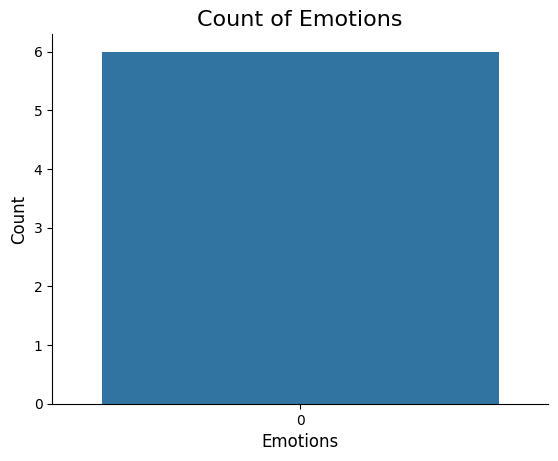

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
a=emotion_df.Emotions.value_counts().values
print(a)
sns.countplot(a)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [16]:
emotion_df.to_csv("balanced_data.csv", index=False)


In [17]:
data,sr = librosa.load(file_path[0])
sr

22050

In [18]:
ipd.Audio(data,rate=sr)


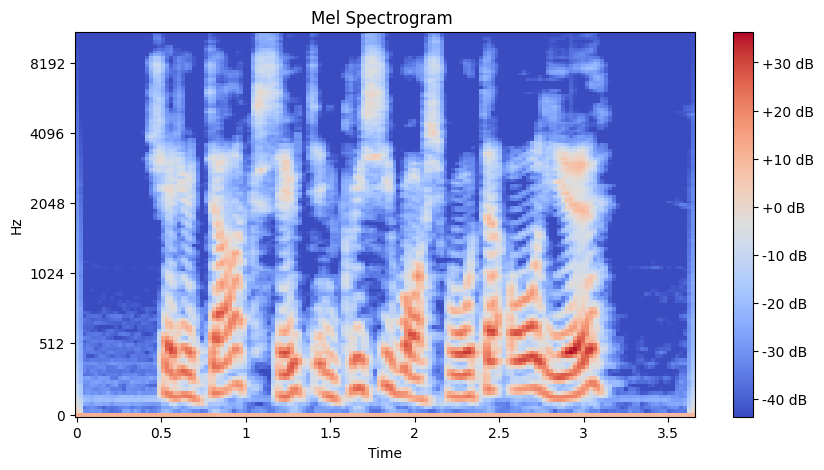

In [19]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

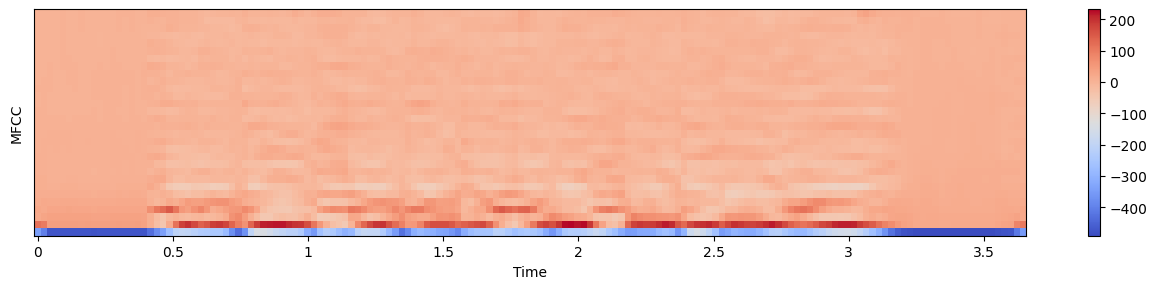

In [20]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [21]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

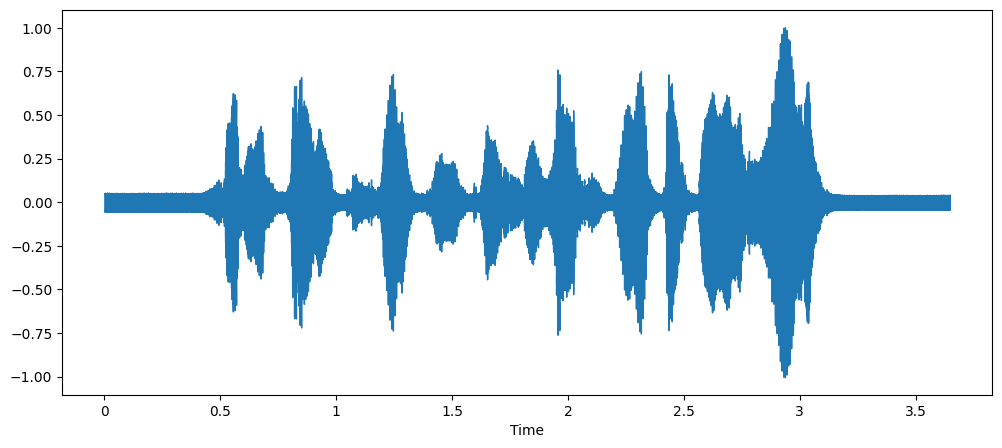

In [22]:
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

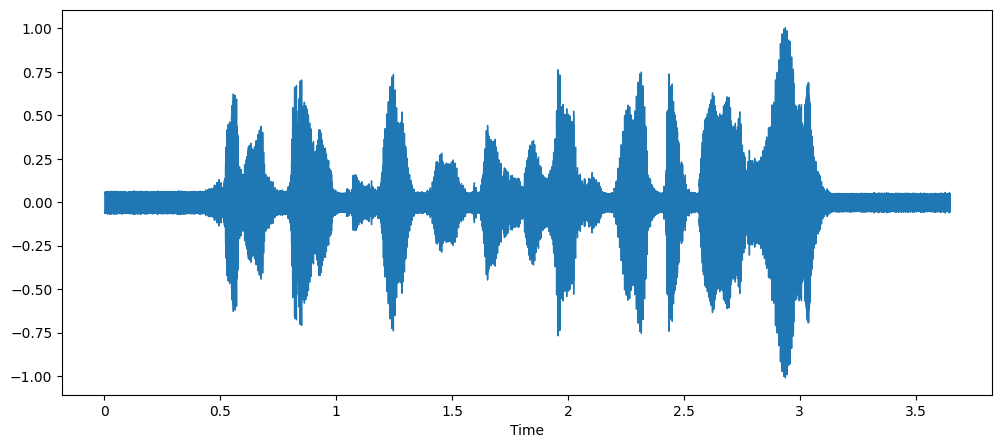

In [23]:
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [24]:
import librosa.feature as lf

def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data,frame_length=2048,hop_length=512):
    #rmse=librosa.feature.rms(y=data)
    rmse=np.sqrt(np.mean(np.square(data)))
    return np.squeeze(rmse)

def mfccc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=lf.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfccc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    #print(data)
    #print(sr)
    #print(librosa.feature.rms(data))
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

In [25]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())
print(emotion_df.columns)

Number of processors:  20
Index(['Emotions', 'Path'], dtype='object')


In [26]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(emotion_df.Path,emotion_df.Emotions,range(emotion_df.Path.shape[0]))):
    
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)


0it [00:00, ?it/s]

3it [00:01,  3.08it/s]

0 audio has been processed


503it [00:36, 15.07it/s]

500 audio has been processed


1004it [01:11, 13.72it/s]

1000 audio has been processed


1504it [01:47, 17.34it/s]

1500 audio has been processed


2001it [02:26, 10.66it/s]

2000 audio has been processed


2503it [03:06, 13.84it/s]

2500 audio has been processed


3003it [03:43, 14.98it/s]

3000 audio has been processed


3503it [04:20, 13.21it/s]

3500 audio has been processed


4002it [05:00, 14.21it/s]

4000 audio has been processed


4503it [05:38, 12.88it/s]

4500 audio has been processed


5003it [06:18, 11.02it/s]

5000 audio has been processed


5501it [07:01, 10.36it/s]

5500 audio has been processed


6003it [07:46, 11.00it/s]

6000 audio has been processed


6502it [08:39, 10.71it/s]

6500 audio has been processed


7002it [09:30,  8.79it/s]

7000 audio has been processed


7502it [10:23, 10.55it/s]

7500 audio has been processed


7910it [11:07, 11.85it/s]

Done
Time:  667.5943574999997


In [27]:

len(X), len(Y), emotion_df.Path.shape


(31640, 31640, (7910,))

In [28]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,Emotions
0,0.261230,0.493164,0.684082,0.769043,0.819336,0.794922,0.781250,0.740234,0.644043,0.589355,0.572754,0.586914,0.622559,0.625488,0.577637,0.516113,0.427734,0.365234,0.290039,0.208496,0.154297,0.074219,0.051270,0.048828,0.040527,0.050781,0.114258,0.150391,0.158203,0.150879,0.083984,0.053223,0.054688,0.149414,0.235352,0.283691,0.334473,0.246094,0.160645,0.113281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-830.973816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
1,0.244629,0.364746,0.490234,0.486816,0.501953,0.499512,0.502441,0.499512,0.498535,0.518066,0.513672,0.514160,0.507324,0.498047,0.509277,0.501953,0.497070,0.479004,0.419434,0.317383,0.212402,0.119141,0.062988,0.082031,0.095215,0.119141,0.179688,0.194824,0.184570,0.167480,0.120117,0.126465,0.213867,0.309570,0.375000,0.407715,0.391602,0.307617,0.223145,0.156250,...,-5.852571,-2.350994,-0.634251,3.891434,2.341908,-0.021158,-0.584472,5.982432,3.414679,-0.808922,0.063446,1.686912,5.914287,3.668350,-0.007310,1.989211,2.203418,5.330073,6.756783,-454.771648,-2.663031,-1.034205,0.031794,3.913548,1.235627,1.764144,0.540201,0.060956,2.069023,1.862840,3.320481,-3.056569,-0.163399,-0.456858,-3.098302,3.567074,5.031552,7.521133,7.392811,happy
2,0.207031,0.296875,0.377930,0.367676,0.351562,0.375488,0.394531,0.337891,0.287109,0.232422,0.199219,0.229004,0.266113,0.283203,0.292969,0.302246,0.299805,0.274414,0.212402,0.153809,0.098633,0.064941,0.070801,0.065430,0.065918,0.095215,0.128418,0.142578,0.143066,0.111816,0.071777,0.071777,0.132324,0.216309,0.303223,0.352539,0.306641,0.223145,0.140137,0.080566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-849.760376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
3,0.256836,0.390625,0.513672,0.509277,0.502930,0.491211,0.495117,0.502441,0.494629,0.493652,0.492188,0.490723,0.504395,0.514648,0.505859,0.501953,0.474609,0.433105,0.345215,0.247559,0.165039,0.095215,0.094238,0.089844,0.107910,0.145020,0.177734,0.188477,0.168457,0.137207,0.117676,0.145996,0.222168,0.305176,0.368652,0.395508,0.343262,0.253418,0.170410,0.104004,...,-4.384254,-4.484216,-2.559742,-4.148051,-2.050354,-0.378999,-6.412419,-0.544953,4.458386,2.302990,-1.084655,-1.975504,-2.967911,-2.925581,-3.192420,1.126365,1.241444,0.615821,-1.113116,-466.780385,-2.176157,-1.495019,-1.572991,-0.303513,-0.400418,-3.651835,-6.531961,-1.646076,-1.088181,-0.447837,-6.214657,-5.985396,-5.908106,-0.218101,3.594558,4.014106,-3.061351,-0.391993,1.699616,happy
4,0.383789,0.606934,0.840332,0.832520,0.844727,0.696289,0.645508,0.679199,0.691895,0.761719,0.681152,0.594238,0.425293,0.439941,0.446289,0.442383,0.458984,0.379395,0.320801,0.210938,0.152832,0.093750,0.063965,0.069824,0.064453,0.049316,0.034180,0.053223,0.168945,0.223633,0.249023,0.232422,0.124512,0.077148,0.054688,0.103516,0.184082,0.197266,0.202637,0.150391,...,7.208772,7.145913,7.042091,6.898703,6.717676,6.501417,6.252795,5.975065,5.671867,5.347068,5.004797,4.649311,4.284972,3.916115,3.547041,3.181906,2.824677,2.479060,2.148457,-802.885925,7.253547,7.208366,7.133560,7.029864,6.898292,6.740129,6.556905,6.350387,6.122542,5.875529,5.611648,5.333336,5.043121,4.743597,4.437376,4.127068,3.815330,3.504623,3.197405,happy


In [29]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267,2268,Emotions
0,0.261230,0.493164,0.684082,0.769043,0.819336,0.794922,0.781250,0.740234,0.644043,0.589355,0.572754,0.586914,0.622559,0.625488,0.577637,0.516113,0.427734,0.365234,0.290039,0.208496,0.154297,0.074219,0.051270,0.048828,0.040527,0.050781,0.114258,0.150391,0.158203,0.150879,0.083984,0.053223,0.054688,0.149414,0.235352,0.283691,0.334473,0.246094,0.160645,0.113281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-830.973816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
1,0.244629,0.364746,0.490234,0.486816,0.501953,0.499512,0.502441,0.499512,0.498535,0.518066,0.513672,0.514160,0.507324,0.498047,0.509277,0.501953,0.497070,0.479004,0.419434,0.317383,0.212402,0.119141,0.062988,0.082031,0.095215,0.119141,0.179688,0.194824,0.184570,0.167480,0.120117,0.126465,0.213867,0.309570,0.375000,0.407715,0.391602,0.307617,0.223145,0.156250,...,-5.852571,-2.350994,-0.634251,3.891434,2.341908,-0.021158,-0.584472,5.982432,3.414679,-0.808922,0.063446,1.686912,5.914287,3.668350,-0.007310,1.989211,2.203418,5.330073,6.756783,-454.771648,-2.663031,-1.034205,0.031794,3.913548,1.235627,1.764144,0.540201,0.060956,2.069023,1.862840,3.320481,-3.056569,-0.163399,-0.456858,-3.098302,3.567074,5.031552,7.521133,7.392811,happy
2,0.207031,0.296875,0.377930,0.367676,0.351562,0.375488,0.394531,0.337891,0.287109,0.232422,0.199219,0.229004,0.266113,0.283203,0.292969,0.302246,0.299805,0.274414,0.212402,0.153809,0.098633,0.064941,0.070801,0.065430,0.065918,0.095215,0.128418,0.142578,0.143066,0.111816,0.071777,0.071777,0.132324,0.216309,0.303223,0.352539,0.306641,0.223145,0.140137,0.080566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-849.760376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,happy
3,0.256836,0.390625,0.513672,0.509277,0.502930,0.491211,0.495117,0.502441,0.494629,0.493652,0.492188,0.490723,0.504395,0.514648,0.505859,0.501953,0.474609,0.433105,0.345215,0.247559,0.165039,0.095215,0.094238,0.089844,0.107910,0.145020,0.177734,0.188477,0.168457,0.137207,0.117676,0.145996,0.222168,0.305176,0.368652,0.395508,0.343262,0.253418,0.170410,0.104004,...,-4.384254,-4.484216,-2.559742,-4.148051,-2.050354,-0.378999,-6.412419,-0.544953,4.458386,2.302990,-1.084655,-1.975504,-2.967911,-2.925581,-3.192420,1.126365,1.241444,0.615821,-1.113116,-466.780385,-2.176157,-1.495019,-1.572991,-0.303513,-0.400418,-3.651835,-6.531961,-1.646076,-1.088181,-0.447837,-6.214657,-5.985396,-5.908106,-0.218101,3.594558,4.014106,-3.061351,-0.391993,1.699616,happy
4,0.383789,0.606934,0.840332,0.832520,0.844727,0.696289,0.645508,0.679199,0.691895,0.761719,0.681152,0.594238,0.425293,0.439941,0.446289,0.442383,0.458984,0.379395,0.320801,0.210938,0.152832,0.093750,0.063965,0.069824,0.064453,0.049316,0.034180,0.053223,0.168945,0.223633,0.249023,0.232422,0.124512,0.077148,0.054688,0.103516,0.184082,0.197266,0.202637,0.150391,...,7.208772,7.145913,7.042091,6.898703,6.717676,6.501417,6.252795,5.975065,5.671867,5.347068,5.004797,4.649311,4.284972,3.916115,3.547041,3.181906,2.824677,2.479060,2.148457,-802.885925,7.253547,7.208366,7.133560,7.029864,6.898292,6.740129,6.556905,6.350387,6.122542,5.875529,5.611648,5.333336,5.043121,4.743597,4.437376,4.127068,3.815330,3.504623,3.197405,happy


In [30]:
print(np.sum(Emotions.isna()))
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape


0               0
1               0
2               0
3               0
4               0
            ...  
2265        24840
2266        24840
2267        24840
2268        24840
Emotions        0
Length: 2270, dtype: int64
0           False
1           False
2           False
3           False
4           False
            ...  
2265        False
2266        False
2267        False
2268        False
Emotions    False
Length: 2270, dtype: bool


(31640, 2270)

In [31]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(Y.shape)
X.shape

(31640, 6)


(31640, 2269)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25312, 2269), (25312, 6), (6328, 2269), (6328, 6))

In [33]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25312, 2269), (25312, 6), (6328, 2269), (6328, 6))

In [34]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)


# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

    
print("Done")

Done


In [175]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_voice_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [176]:

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((25312, 2269, 1), (25312, 6), (6328, 2269, 1), (6328, 6))

In [177]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2269, 512)         3072      
                                                                 
 batch_normalization_6 (Batc  (None, 2269, 512)        2048      
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1135, 512)        0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1135, 512)         1311232   
                                                                 
 batch_normalization_7 (Batc  (None, 1135, 512)        2048      
 hNormalization)                                                 
                                                      

In [178]:
history=model.fit(x_traincnn, y_train, epochs=20, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/20
396/396 [==============================] - 1736s 4s/step - loss: 1.4417 - accuracy: 0.4581 - val_loss: 2.8577 - val_accuracy: 0.2309 - lr: 0.0010
Epoch 2/20
396/396 [==============================] - 1808s 5s/step - loss: 1.1603 - accuracy: 0.5528 - val_loss: 1.2432 - val_accuracy: 0.5299 - lr: 0.0010
Epoch 3/20
396/396 [==============================] - 1781s 4s/step - loss: 1.0341 - accuracy: 0.6027 - val_loss: 1.0690 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 4/20
396/396 [==============================] - 1748s 4s/step - loss: 0.9195 - accuracy: 0.6508 - val_loss: 0.9712 - val_accuracy: 0.6470 - lr: 0.0010
Epoch 5/20
396/396 [==============================] - 1800s 5s/step - loss: 0.7935 - accuracy: 0.7004 - val_loss: 0.9155 - val_accuracy: 0.6498 - lr: 0.0010
Epoch 6/20
396/396 [==============================] - 1783s 5s/step - loss: 0.6864 - accuracy: 0.7468 - val_loss: 0.7365 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 7/20
396/396 [==============================] - 1888

198/198 [==============================] - 85s 431ms/step - loss: 0.0921 - accuracy: 0.9728
Accuracy of our model on test data :  97.28192090988159 %


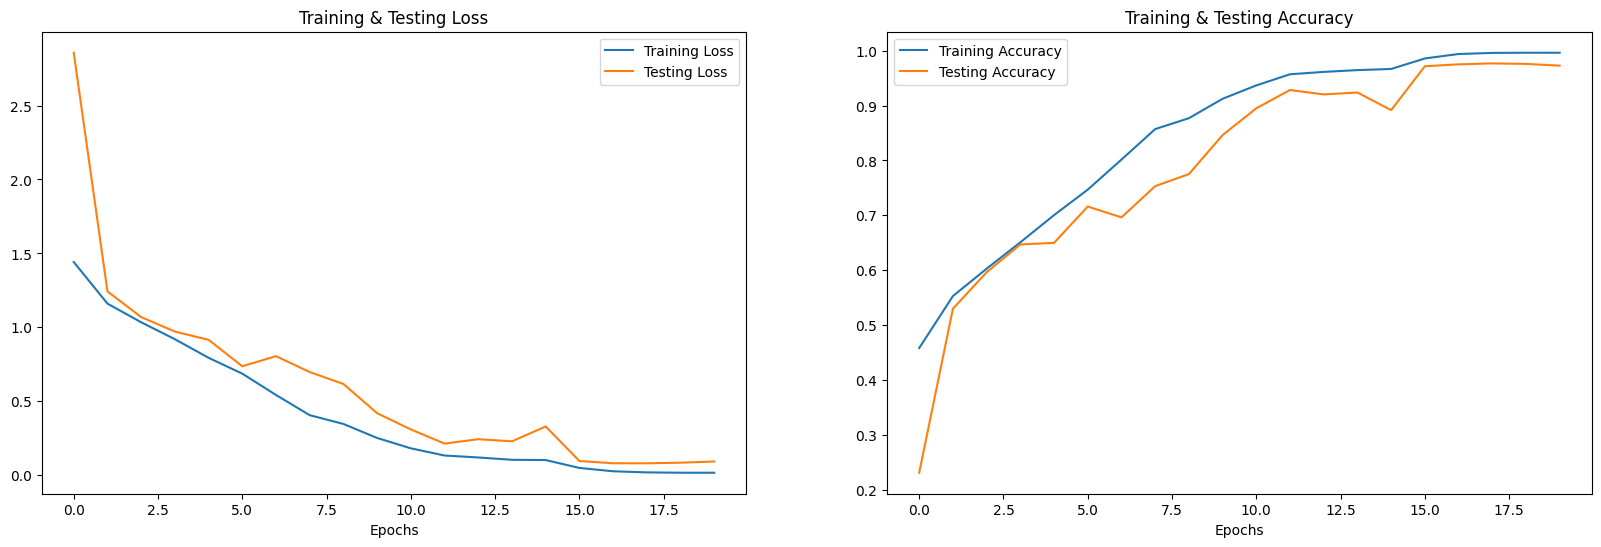

In [179]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [180]:
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("voice_recog_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("voice_recog_model.h5")
print("Saved model to disk")


Saved model to disk


In [2]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('voice_recog_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("voice_recog_model.h5")
print("Loaded model from disk")

Loaded model from disk
